This dataset focuses on Noise complaints that were collected in 2016 and indicate ongoing party in a given neighborhood.

I will be carrying out an explanatory analysis on NYC complaint data set from December 2015 to December 2016.The aim of the analysis is not only to understand the data set better but also answer some of the key questions that will help he community to find the patterns in the data that will lead to better solutions.



In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Dataset

In [2]:
d1 = pd.read_csv('bar_locations.csv')
d2 =  pd.read_csv('party_in_nyc.csv')

In [3]:
d1.head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


In [4]:
d1.shape

(2440, 7)

In [5]:
d2.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [6]:
d2.shape

(225414, 8)

### Merge the Dataset

In [10]:
df = pd.merge(d1, d2,  how='left', left_on=['Incident Zip', 'City', 'Borough', 'Latitude',
       'Longitude'], right_on = ['Incident Zip', 'City', 'Borough', 'Latitude',
       'Longitude'])


In [11]:
df.shape

(23377, 10)

In [13]:
#missing values
df.isnull().sum()

Location Type_x      0
Incident Zip         0
City                 0
Borough              0
Latitude             0
Longitude            0
num_calls            0
Created Date       859
Closed Date        870
Location Type_y    859
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(22507, 10)

In [11]:
df.head()

,Location Type_x,Incident Zip,City,Borough,Latitude,Longitude,num_calls,Created Date,Closed Date,Location Type_y
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18,2016-02-12 10:24:51,2016-02-12 13:06:53,Club/Bar/Restaurant
2,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18,2016-03-31 23:26:56,2016-04-01 04:03:55,Club/Bar/Restaurant
3,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18,2016-04-13 00:31:18,2016-04-13 01:32:31,Club/Bar/Restaurant
4,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21,2016-06-04 20:29:04,2016-06-04 21:40:41,Club/Bar/Restaurant
5,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21,2016-06-17 22:24:44,2016-06-17 23:20:54,Club/Bar/Restaurant


In [12]:
# Changing dtype

In [13]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Adding new Columns from Day,Month and Year 

df['Year'] = df['Created Date'].dt.year.astype(str)
df['Month']= df['Created Date'].dt.month
df['Day']= df['Created Date'].dt.day
df['MON']= df['Created Date'].dt.strftime("%b")
df['Days']= df['Created Date'].dt.strftime("%a")
df['Time']= df['Created Date'].dt.strftime("%X")
df['Time']= pd.to_timedelta(df['Time'])
df['YYYYMM'] = df["MON"] + "-" +df["Year"].astype(str)

Has the complaint increased or decreased by M-o-M?

Text(0.5,0,'Month')

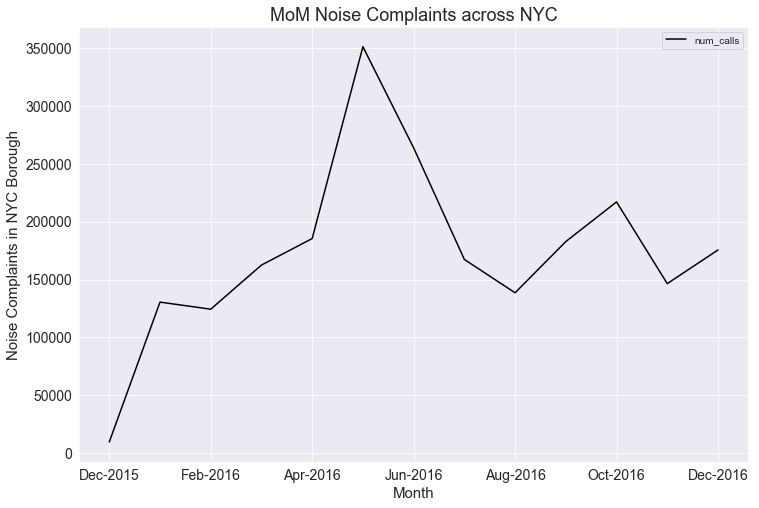

In [14]:
sns.set_style('darkgrid')
MMM = pd.pivot_table(df,columns='YYYYMM',values='num_calls',aggfunc='sum')
MMM = MMM[['Dec-2015','Jan-2016', 'Feb-2016','Mar-2016','Apr-2016','May-2016','Jun-2016','Jul-2016', 'Aug-2016','Sep-2016','Oct-2016','Nov-2016','Dec-2016']]
MMM.T.plot(figsize=(12, 8),color='black')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('MoM Noise Complaints across NYC',fontsize=18)
plt.ylabel('Noise Complaints in NYC Borough',fontsize=15)
plt.xlabel('Month',fontsize=15)

Noise Complaints peaks around festivals, we can clearly see a seasonal pattern from New Year, Easter, Halloween and Christmas.

## Borough

What Borough has the most noise complaints?

In [63]:
df.groupby(['Borough'])['num_calls'].sum()

Borough
BRONX             66110
BROOKLYN         981258
MANHATTAN        906655
QUEENS           278740
STATEN ISLAND     22540
Name: num_calls, dtype: int64

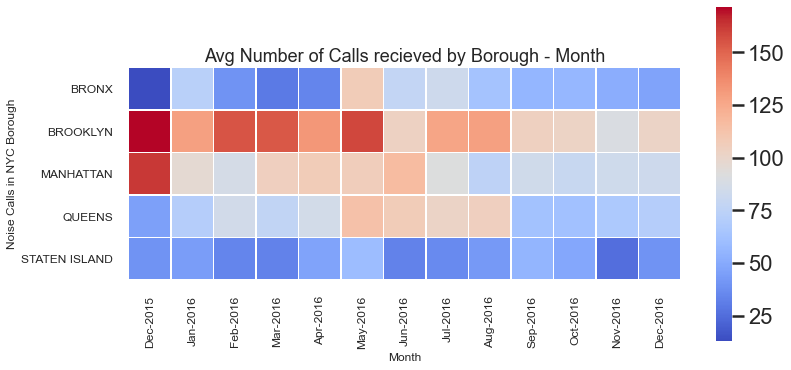

In [64]:
MM = pd.pivot_table(df,index='Borough',columns='YYYYMM',values='num_calls',aggfunc=np.mean)
Day = pd.pivot_table(df,index='Borough',columns='Days',values='num_calls',aggfunc=np.mean)


MM = MM[['Dec-2015','Jan-2016', 'Feb-2016','Mar-2016','Apr-2016','May-2016','Jun-2016','Jul-2016', 'Aug-2016','Sep-2016','Oct-2016','Nov-2016','Dec-2016']]
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(MM, cmap="coolwarm", linewidths=.5,cbar_kws={"shrink": .5},square=True)
plt.title('Avg Number of Calls recieved by Borough - Month',fontsize=18)
plt.ylabel('Noise Calls in NYC Borough',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

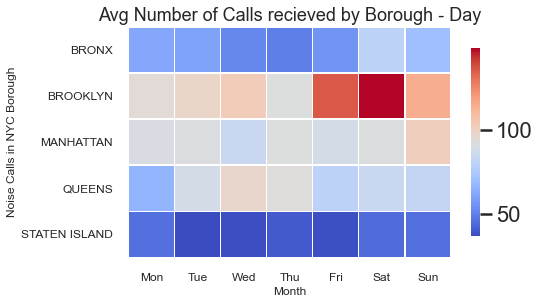

In [65]:
Day = Day[['Mon','Tue', 'Wed', 'Thu','Fri', 'Sat', 'Sun']]
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(Day, cmap="coolwarm", linewidths=.5,cbar_kws={"shrink": .5},square=True)
plt.title('Avg Number of Calls recieved by Borough - Day',fontsize=18)
plt.ylabel('Noise Calls in NYC Borough',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

- On Average Bronx received fewer noise calls in all of the 5 Borough. Whereas Brooklyn/Manhattan received twice as many calls than Bronx. 
- On Weekend there more calls received, this could be due to more people going out.

- Are there fewer Club/Bar/Restaurant in Bronx?

## MAP 

C:\Users\jaspr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Longitude')

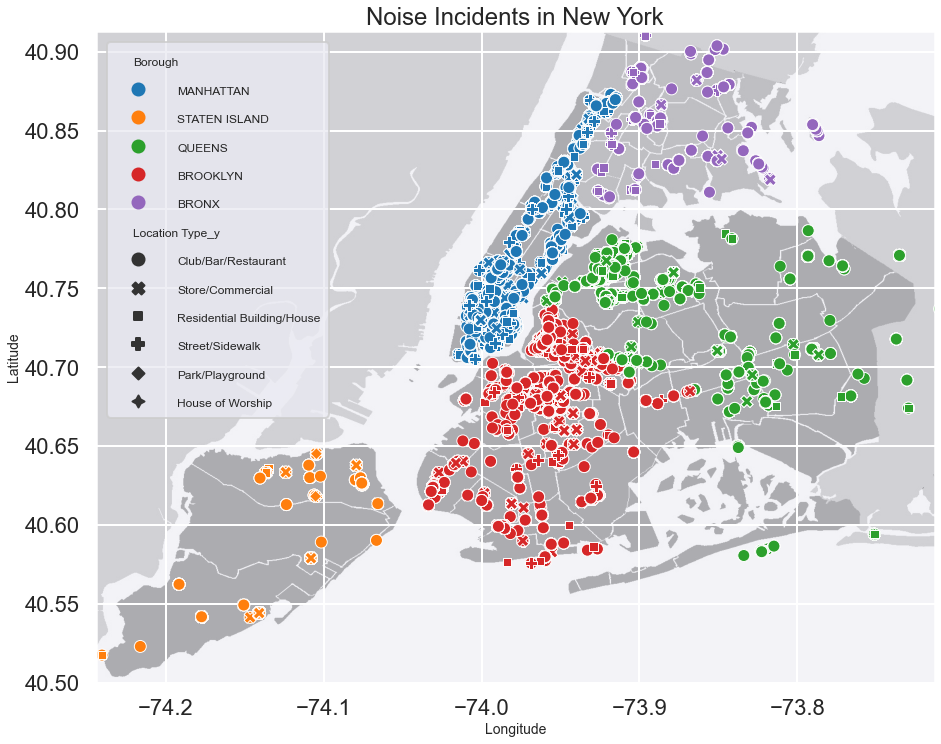

In [66]:
import matplotlib.image as mpimg
NewYork_img=mpimg.imread('NewYork.png', 0)
sns.set_context('poster')
plt.figure(figsize=(25,12))
ax =sns.scatterplot(df.Longitude,df.Latitude, hue=df.Borough,style=df['Location Type_y'])
#ax =sns.scatterplot(df.Longitude,df.Latitude, hue=df.Borough, markers=["m", "s",'q','b','bx'])

plt.imshow(NewYork_img,extent=[-74.24441999999999, -73.71299, 40.499790000000004, 40.913059999999994], alpha=0.5)

plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.title("Noise Incidents in New York")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

In [67]:
df['Location Type_y'].value_counts()

Club/Bar/Restaurant           11869
Store/Commercial               7428
Residential Building/House     2112
Street/Sidewalk                1045
Park/Playground                  47
House of Worship                  6
Name: Location Type_y, dtype: int64

In [68]:
df.groupby(['Location Type_x','Borough'])['Location Type_x'].count()

Location Type_x      Borough      
Club/Bar/Restaurant  BRONX             984
                     BROOKLYN         7971
                     MANHATTAN        9712
                     QUEENS           3311
                     STATEN ISLAND     529
Name: Location Type_x, dtype: int64

Brooklyn/Manhattan has 8 to 9 times more Club/Bar/Restaurant than Bronx(& Staten Island).Which mean there could be a correlation between more places more noise complaints.

## ZIP Code

In [36]:
Bors = df[df['Borough']=='BROOKLYN']
Man =  df[df['Borough']=='MANHATTAN']
Brooklyn = Bors.groupby(['Borough','Incident Zip'])['Location Type_x'].count().nlargest(20)
Manhattan = Man.groupby(['Borough','Incident Zip'])['Location Type_x'].count().nlargest(20)

In [37]:
Brooklyn

Borough   Incident Zip
BROOKLYN  11216.0         1072
          11238.0          894
          11206.0          868
          11211.0          811
          11237.0          519
          11249.0          463
          11221.0          459
          11217.0          441
          11209.0          341
          11234.0          317
          11205.0          204
          11213.0          179
          11222.0          151
          11203.0          130
          11207.0          129
          11235.0          124
          11220.0          114
          11226.0          109
          11201.0          101
          11223.0           82
Name: Location Type_x, dtype: int64

In [38]:
Manhattan

Borough    Incident Zip
MANHATTAN  10009.0         1039
           10002.0          971
           10034.0          851
           10036.0          547
           10033.0          483
           10003.0          466
           10040.0          454
           10019.0          437
           10031.0          379
           10012.0          314
           10014.0          310
           10016.0          306
           10029.0          297
           10011.0          288
           10028.0          253
           10027.0          241
           10025.0          209
           10001.0          201
           10032.0          181
           10030.0          134
Name: Location Type_x, dtype: int64

In [48]:
calls = pd.pivot_table(Bors,index=['Incident Zip','Location Type_y'],values=['num_calls','xx'],aggfunc='sum').reset_index()
calls_2 = pd.pivot_table(Man,index=['Incident Zip','Location Type_y'],values=['num_calls','xx'],aggfunc='sum').reset_index()

Text(0.5,0,'No of Incidents')

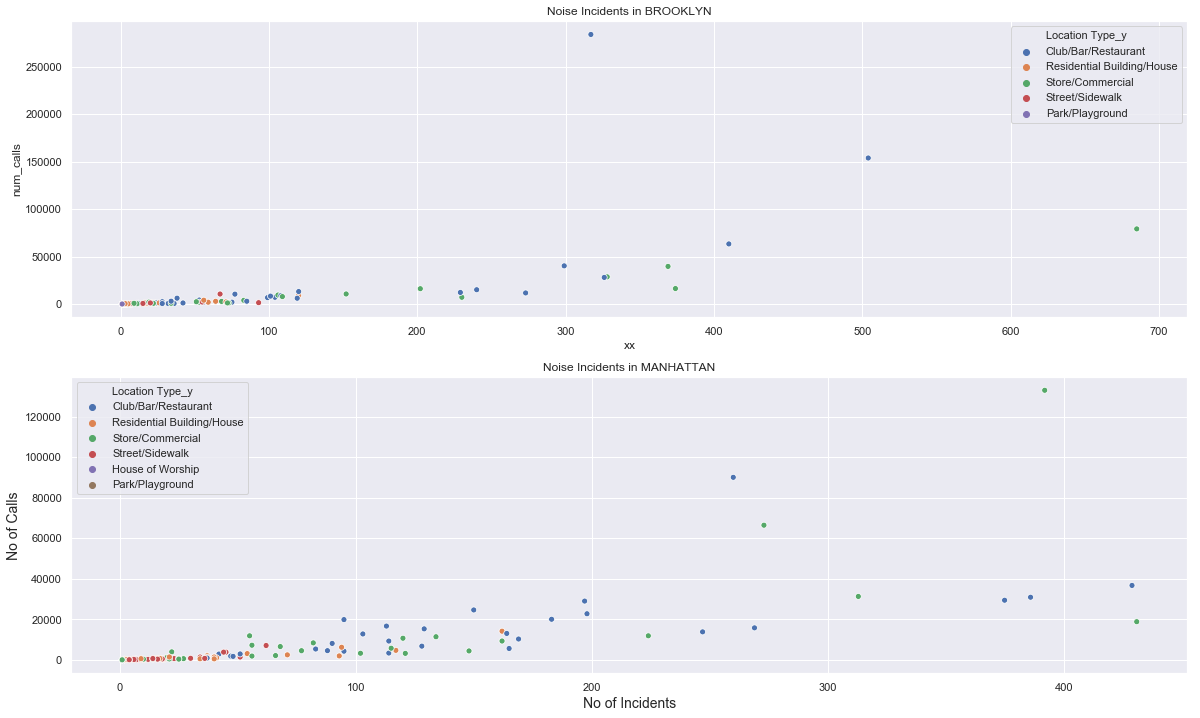

In [50]:
sns.set(style="darkgrid")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig,ax=plt.subplots(2,1,figsize=(20,12),squeeze=False)

sns.scatterplot(x=calls['xx'],y=calls['num_calls'],hue = calls['Location Type_y'],ax=ax[0][0])
sns.scatterplot(x=calls_2['xx'],y=calls_2['num_calls'],hue = calls_2['Location Type_y'],ax=ax[1][0])
ax[0][0].set_title('Noise Incidents in BROOKLYN')
ax[1][0].set_title('Noise Incidents in MANHATTAN')
plt.ylabel("No of Calls", fontsize=14)
plt.xlabel("No of Incidents", fontsize=14)

In [69]:
calls = pd.pivot_table(df,index='Borough',values='num_calls',aggfunc='sum').reset_index()
bars= pd.pivot_table(df,index='Borough',values='num_calls',aggfunc='count').reset_index()
concat = pd.merge(calls,bars,on='Borough')

In [70]:
concat = concat.rename(columns={'Borough':'Borough','num_calls_x':'num_calls','num_calls_y':'bars'})

In [71]:
concat['call_%'] = (concat['num_calls']/concat['bars'])

In [72]:
concat

,Borough,num_calls,bars,call_%
0,BRONX,66110,984,67.184959
1,BROOKLYN,981258,7971,123.103500
2,MANHATTAN,906655,9712,93.354098
3,QUEENS,278740,3311,84.186047
4,STATEN ISLAND,22540,529,42.608696


### Time

In [105]:
#df["binned_hours"] = pd.cut(df['Created Date'].dt.strftime("%X"), bins=24)

In [85]:
df['Time'] = pd.to_timedelta(df.Time)
time = df.groupby(df.Time.dt.floor('60min'))['Borough'].count()

In [87]:
time = time.reset_index()
time['Time'] =time['Time'].astype(str)
time['Time'] =time['Time'].str.replace('0 days ','')

Text(0.5, 0, 'Hours')

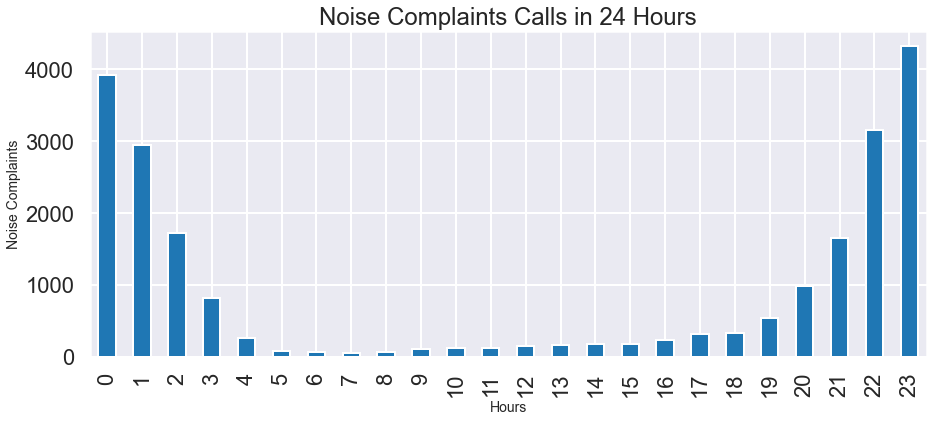

In [104]:
time.plot(figsize=(15,6),kind='bar',legend=None,title='Noise Complaints Calls in 24 Hours')
plt.ylabel("Noise Complaints", fontsize=14)
plt.xlabel("Hours", fontsize=14)

In [115]:
bor = df.groupby([df.Time.dt.floor('60min'),'Borough'])['Year'].count()
bor = bor.reset_index()
bor['Time'] =bor['Time'].astype(str)
bor['Time'] =bor['Time'].str.replace('0 days ','')

In [122]:
new_bor = pd.pivot_table(bor,index='Borough',columns='Time',values='Year',aggfunc=np.mean)

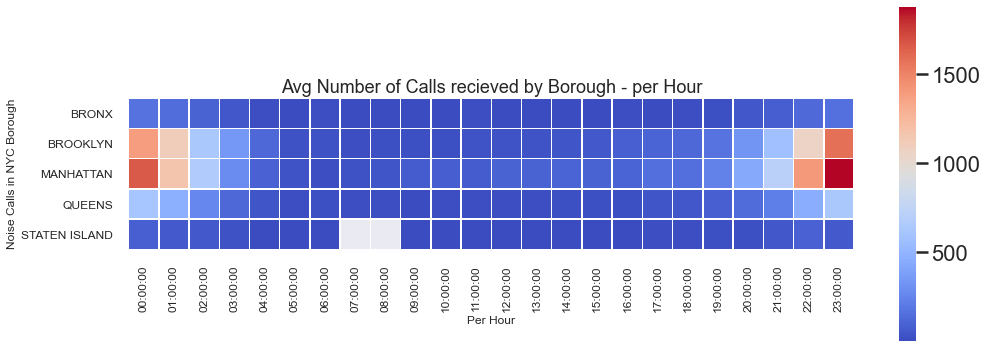

In [132]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_bor, cmap="coolwarm", linewidths=.5,cbar_kws={"shrink": .5},square=True)
plt.title('Avg Number of Calls recieved by Borough - per Hour',fontsize=18)
plt.ylabel('Noise Calls in NYC Borough',fontsize=12)
plt.xlabel('Per Hour',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

In [128]:
mont = df.groupby([df.Time.dt.floor('60min'),'Month'])['Year'].count()
mont = mont.reset_index()
mont['Time'] =mont['Time'].astype(str)
mont['Time'] =mont['Time'].str.replace('0 days ','')

In [130]:
new_mont = pd.pivot_table(mont,index='Month',columns='Time',values='Year',aggfunc=np.mean)

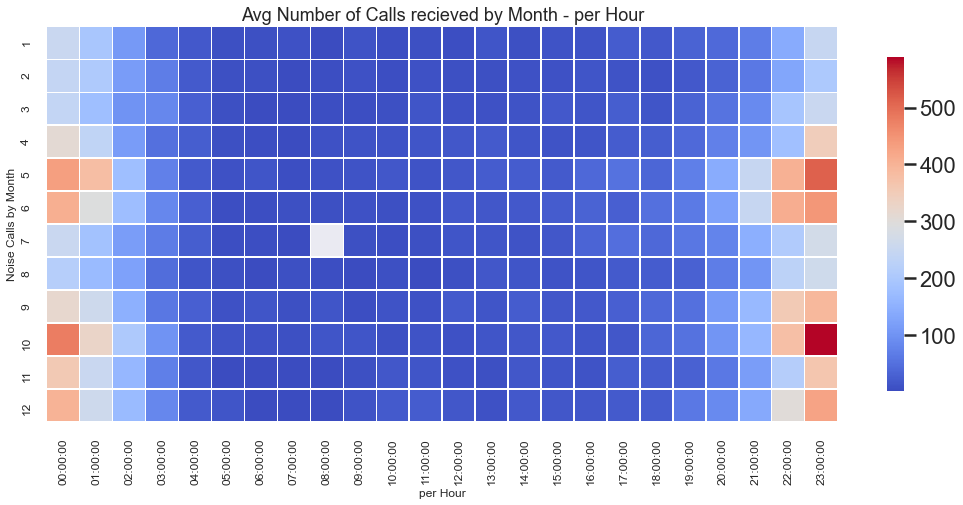

In [133]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_mont, cmap="coolwarm", linewidths=.5,cbar_kws={"shrink": .5},square=True)
plt.title('Avg Number of Calls recieved by Month - per Hour',fontsize=18)
plt.ylabel('Noise Calls by Month',fontsize=12)
plt.xlabel('per Hour',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

Suggestions: 
    
   - Increasing Police present across Manhattan and Brooklyn around festivals will decrease the peak noise complaints.
    
   -  In Brooklyn there are only 18 Zip code that had more than 100 noise and in Manhattan there are 19 Zip code. Having more Police present in these area could help to reduce noise complaints.
   - Majority of the noise complaints occur between 10pm and 2am - especially in Brooklyn and Manhattan
   - Weekends have more complaints compare to week days.  